In [11]:
def Half_V_SHO_matrix(x_mesh):
    """
    Harmonic oscillator potential matrix (defined as a diagonal matrix)
    """
    k = 1/2       # k is chosen so that hbar*omega = 1 
    inf = 1.e10
    #V_diag = k * x_mesh**2 / 2  # diagonal matrix elements
    V_diag = [k * x**2 / 2 if x > 0 else inf for x in x_mesh]  # using a list comprehension
    N = len(x_mesh)  # number of x points
    
    return V_diag * np.diag(np.ones(N), 0) 

In [21]:
def xsq_matrix(x_mesh):
    """
    matrix for x^2 operator
    """
    N = len(x_mesh)  # number of x points

    return x_mesh**2 * np.diag(np.ones(N), 0) 

In [12]:
# Combine matrices to make the Hamiltonian matrix
V_SHO = V_SHO_matrix(x_mesh)
V_SHO_half = Half_V_SHO_matrix(x_mesh)

Hamiltonian = -second_deriv + V_SHO  
Hamiltonian_half = -second_deriv + V_SHO_half  

In [13]:
# Try diagonalizing using numpy functions
eigvals, eigvecs = np.linalg.eigh(Hamiltonian)
eigvals_half, eigvecs_half = np.linalg.eigh(Hamiltonian_half)

In [14]:
print(eigvals[0:10])

[0.49999375 1.49996875 2.49991875 3.49984375 4.49974377 5.49961909
 6.49947187 7.49931583 8.49922262 9.49949943]


In [15]:
print(eigvals_half[0:10])

[ 1.49996875  3.49984374  5.49961909  7.49931582  9.49949942 11.50746164
 13.56634931 15.78531269 18.27854793 21.09521963]


Notice that they are all *above* the exact answer. Variational principle!

In [16]:
wf_0 = eigvecs[:,0]
wf_1 = eigvecs[:,1]
wf_2 = eigvecs[:,2]

wf_half_0 = eigvecs_half[:,0]
wf_half_1 = eigvecs_half[:,1]
wf_half_2 = eigvecs_half[:,2]

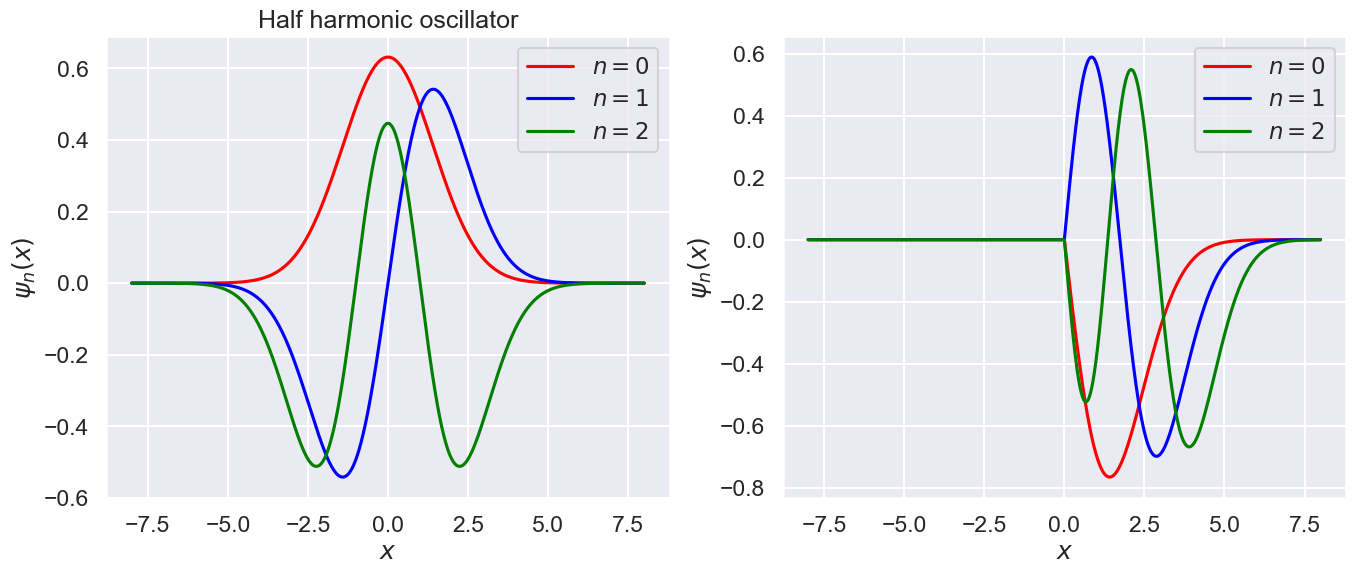

In [17]:
scale = 1. / np.sqrt(Delta_x)  # scale factor to remove weights from wave function

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\psi_n(x)$')
#ax1.set_xlim(0, x_max)
#ax1.set_ylim(-1., 3)

ax1.plot(x_mesh, scale * wf_0, color='red', label=r'$n=0$')
ax1.plot(x_mesh, scale * wf_1, color='blue', label=r'$n=1$')
ax1.plot(x_mesh, scale * wf_2, color='green', label=r'$n=2$')
ax1.set_title('Full harmonic oscillator')
ax1.legend();

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\psi_n(x)$')
#ax1.set_xlim(0, x_max)
#ax1.set_ylim(-1., 3)

ax2.plot(x_mesh, scale * wf_half_0, color='red', label=r'$n=0$')
ax2.plot(x_mesh, scale * wf_half_1, color='blue', label=r'$n=1$')
ax2.plot(x_mesh, scale * wf_half_2, color='green', label=r'$n=2$')

ax1.set_title('Half harmonic oscillator')
ax2.legend();



### Calculate the expectation value of $\hat x^2$

In [25]:
xsq_exp_val = wf_0 @ xsq_matrix(x_mesh) @ wf_0
print(f'{xsq_exp_val:.3f}')

1.000


In [26]:
xsq_half_exp_val = wf_half_0 @ xsq_matrix(x_mesh) @ wf_half_0
print(f'{xsq_half_exp_val:.3f}')

3.000
